# Praktikum 2

Bitte führen Sie die folgende Zelle aus, um benötigte Python Module zu laden.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Bitmanipulationen

Eine Temperaturmessstation mißt in regelmäßigen Abständen die Umgebungstemperatur. Jeder gemessene Wert M ist ein 7-Bit Wert im folgenden Format:

| V | T5 | T4 | T3 | T2 | T1 | T0 |

T5-T0 bilden eine Binärzahl. V ist 0, wenn die Binärzahl negativ ist und 1, wenn sie positiv ist.

D.h. der Wertebereich ist von $-2^6-1$ bis $2^6-1$. Bei einem Wert von 0 spielt das Vorzeichen keine Rolle und kann ignoriert werden.

Beispiel:

0100000 : 32°C  
1001000 : -8°C

Um viele Messwerte ressourcensparend zu übertragen werden sie aneinandergehängt und als ein langer Bitstream übertragen, wobei der älteste Messwert als erstes übertragen wird:

$M_nM_{n-1}...M_0$ -> Ihr Computer

**Aufgabe:** Implementieren Sie die folgende Funktion, die als Eingabe einen Bitstream in Form eines Integers erhält und als Ausgabe eine Liste mit den einzelnen Messwerten zurück liefert.

Zum Testen Ihrer Funktion können Sie den folgenden Bitstream verwenden:  
001111100111010011110001111000111000010111001100000110110011000001000100101000010111001011000100100001110000111000010100001111000011100010010000101000100000001001000001

Als Dezimalzahl lautet der Bitstream:  
91280738743542157185825863987460161568160524403265

In [2]:
def decode_stream(stream):
    """
    This function decodes a bitstream of temperature values and returns a list of the decoded measurements.
    
    Parameters:
        stream : integer
            The bitstream of temperature measurements.
        
    Returns:
        A list of measurements
    """
    
    # The input parameter must be in string to assure no first 0-digits to be removed
    if isinstance(stream, str) == False:
        raise NameError('The input parameter must be in string to assure no first 0-digits to be removed')
    # Convert the input string into integer array
    bin = []
    for i in stream:
        bin.append(int(i))
    # Calculate the array length
    l = len(bin)
    # Main loop
    dec = 0
    for i in range(1,l):
        dec = dec + bin[i]*(2**(l-i-1))
    if bin[0] == 1:
        dec = -dec
    return dec

# The following line call your function and return the result
bitstream = 0b001111100111010011110001111000111000010111001100000110110011000001000100101000010111001011000100100001110000111000010100001111000011100010010000101000100000001001000001
print(bitstream)

# Validation of our function
stream = '001111100111010011110001111000111000010111001100000110110011000001000100101000010111001011000100100001110000111000010100001111000011100010010000101000100000001001000001'
print(decode_stream(stream))

91280738743542157185825863987460161568160524403265
91280738743542157185825863987460161568160524403265


**Aufgabe:** Plotten Sie die Temperaturwerte in einem Graphen.

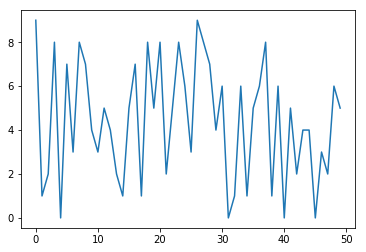

In [12]:
dec = decode_stream(stream)
y = []
for i in str(dec):
    y.append(int(i))
x = range(len(y))

plt.plot(x, y)
plt.show()

**Aufgabe:** Sie sind mit dem Aussehen des Graphen noch nicht zufrieden. Implementieren Sie die folgende Funktion, die jeweils einen Mittelwert von drei aufeinanderfolgenden Werten berechnet.

Beispiel:  
Originalwerte: 0, 1, 2, 3, 4, 5, 6  
Moving average: (0+1+2)/3, (1+2+3)/3, (2+3+4)/3, ...  


In [16]:
def moving_average(m):
    """
    Calculates the moving average of a given numpy array.
    
    Parameters:
        m : numpy.array
            The values of the signal.
    
    Returns:
        A new numpy.array
    """
    
    # Convert the input string into integer array
    avg = []
    for i in str(m):
        avg.append(int(i))
    # Main loop
    mov_avg = []
    for i in range(0,len(avg)-2):
        mov_avg.append(np.mean([avg[i],avg[i+1],avg[i+2]], axis=0))
    return mov_avg

# The following line decodes a bitstream calculates a moving average and prints the result
print(moving_average(decode_stream(stream)))

[4.0, 3.6666666666666665, 3.3333333333333335, 5.0, 3.3333333333333335, 6.0, 6.0, 6.333333333333333, 4.666666666666667, 4.0, 4.0, 3.6666666666666665, 2.3333333333333335, 2.6666666666666665, 4.333333333333333, 4.333333333333333, 5.333333333333333, 4.666666666666667, 7.0, 5.0, 5.0, 5.0, 6.333333333333333, 5.666666666666667, 6.0, 6.666666666666667, 8.0, 6.333333333333333, 5.666666666666667, 3.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.6666666666666665, 4.0, 4.0, 6.333333333333333, 5.0, 5.0, 2.3333333333333335, 3.6666666666666665, 2.3333333333333335, 3.6666666666666665, 3.3333333333333335, 2.6666666666666665, 2.3333333333333335, 1.6666666666666667, 3.6666666666666665, 4.333333333333333]


**Aufgabe:** Plotten Sie erneut das verarbeitete Temperatursignal erneut. Was fällt Ihnen auf?

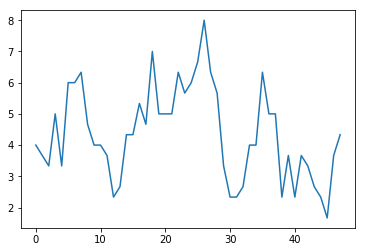

In [11]:
# The moving average array got its length 2 units less than the former's
y_mov = moving_average(decode_stream(stream))
x_mov = range(len(y_mov))
plt.plot(x_mov, y_mov)
plt.show()

## Elementarsignale

In der diskreten Welt nutz man anstelle des Dirac Delta Impulses das Kronecker Delta, welches an der Stelle t=0 den Wert 1 hat, ansonsten 0.

Das Submodul Signal des Moduls Scipy besitzt eine Funktion ```unit_impulse()``` ([Dokumentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.unit_impulse.html)), die einen Kronecker Delta mit einer beliebigen Länge erzeugt.

**Aufgabe:** Erzeugen Sie eine Kronecker Delta Impuls der Länge 100 und plotten Sie das Ergebnis.

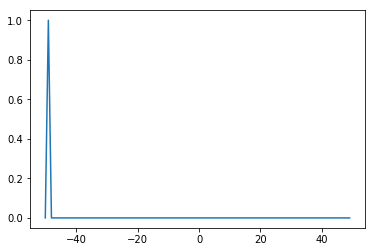

In [17]:
imp = signal.unit_impulse(100,1)
plt.plot(np.arange(-50, 50), imp)

Ein Signal x(t) wird um t0 Einheiten nach rechts verschoben, indem man x(t-t0) berechnet. Die Funktion unit_impulse akzeptiert einen zweiten Parameter, der die Verschiebung definiert.

**Aufgabe:** Plotten Sie einen um 10 nach rechts verschobenen Dirac Impuls.

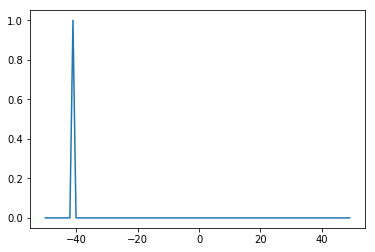

In [28]:
for i in range(0,10):
    mov_imp = signal.unit_impulse(100,i)
    plt.plot(np.arange(-50, 50), mov_imp)

Als nächstes wollen wir ein Cosinus Signal ausgeben. Es ist definiert als x(t) = Acos(2\*pi\*f\*t + phi).

**Aufgabe:** Implementieren Sie dazu die folgende Funktion. Beachten Sie bitte die Kommentare/Hinweise im Code.

In [57]:
def sine_wave(f=10, phi=0, A=1, t=1, Fs=100):
    """
    This function creates a sine wave of the given frequency, duration, a phase angle using Fs samples per second.
    
    Parameters:
        f : int
            The frequency of the sine wave in Hz.
        phi : int
            The phase angle in radians
        A : float
            The amplitude
        t : float
            The duration (0..t) in s
        Fs : int
            The sampling rate (samples per second)
        
    Returns:
        Numpy Array with the generated signal
            
    """
    
    omega = 2*np.pi*f 
    Ts    = 1/Fs
    N     = int(t/Ts) # total number of samples for the given duration and sample rate
    
    # some additional information just for fun
    cycles =   t/(1/f) # number of cycles of the sine wave that will be plot
    samples_per_cycle = int(N/cycles) # number of samples per cycle
    
    # Create a numpy array with N discrete points in time starting
    # from 0 with a step size of Ts.    
    t_vec = []
    for i in range(0,N):
        t_vec.append(i*Ts)
        
    # Now calculate the sine wave as numpy array
    x_vec = []
    for i in range(0,N):
        x_vec.append(A*np.sin(omega*t_vec[i] + phi))
    
    d = {"total" : N, "cycles" : cycles, "samples_per_cycle" : samples_per_cycle}
    
    return t_vec, x_vec, d

Wenn Sie alles richtig gemacht haben, dann sollten Sie einen Plot einer Sinusfunktion sehen, wenn Sie die nachfolgende Zelle ausführen.

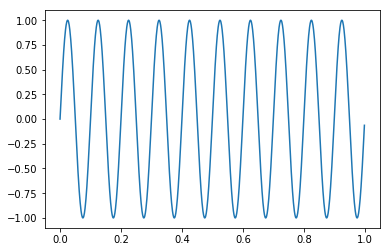

Number of cycles:  10.0
Total samples:  1000
Samples per cycle:  100


In [58]:
t, x, infos = sine_wave(f=10, Fs=1000)
plt.plot(t, x, '-')
plt.show()
print("Number of cycles: ", infos["cycles"])
print("Total samples: ", infos["total"])
print("Samples per cycle: ", infos["samples_per_cycle"])

# Frohe Osterfeiertage! :-)